### 2.1 Images

1. Download the MNIST dataset using the torchvision library and create a subset
of the dataset containing 1,000 samples. Each sample will include a 28 × 28 pixel
image, along with a single integer value denoting the sample’s respective class (number).

In [102]:
import torchvision.datasets as datasets
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from einops import rearrange

mnist = datasets.MNIST(root='./data', download= True, transform=None)
subset = torch.utils.data.Subset(mnist, torch.randperm(len(mnist))[:1000])

2. Plot a histogram of classes in your subset of MNIST.

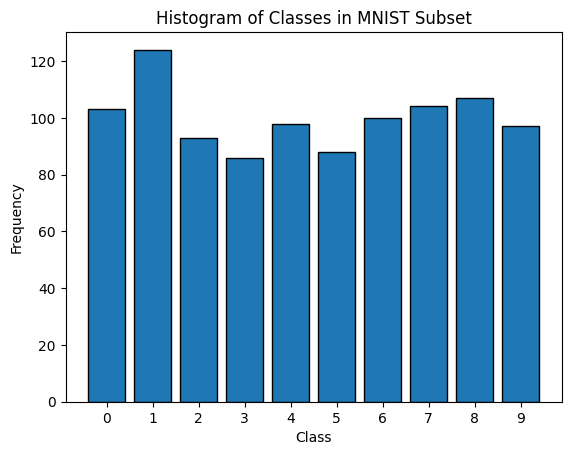

In [6]:
subset_labels = [subset[i][1] for i in range(len(subset))]

# Plot a histogram of the classes
plt.hist(subset_labels, bins=range(11), edgecolor='black', align='left', rwidth=0.8)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Classes in MNIST Subset')
plt.xticks(range(10))
plt.show()

3. Use the einops python package to ‘batch’ the subset of MNIST images. Each
batch should contain 25 different samples

In [41]:

batches = rearrange(subset.dataset.data[subset.indices], '(b n c) w h -> n b c w h', b =25, c = 1)
batches.shape

torch.Size([40, 25, 1, 28, 28])

4. Randomly select an MNIST image sample and, using matplotlib, plot it in three
dimensions. The x and y-axis’ should be the respective pixel locations, and the
z-axis should be the pixel intensity.

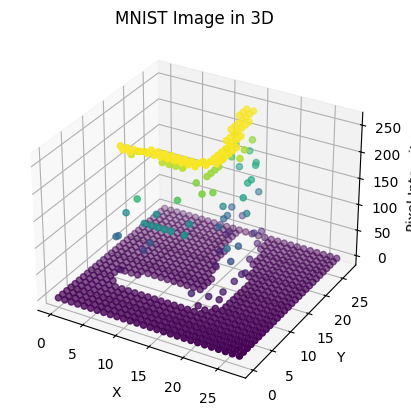

In [69]:
image, _ = subset[np.random.randint(1000)]

pixel_intensities = np.array(image).reshape((28, 28))

x_coords, y_coords = np.meshgrid(np.arange(28), np.arange(28))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, pixel_intensities, c=pixel_intensities)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pixel Intensity')
plt.title('MNIST Image in 3D')
plt.show()


### 2.2 Time Series

**Data:** Experimental data used to analyze appliances energy use in an energy efficient
building. The data set is collected at a frequency of 10 min for about 4.5 months. The
house temperature and humidity conditions were monitored with a ZigBee wireless sensor
network. Each wireless node transmitted the temperature and humidity conditions at a
period of around 3.3 min. Then, the wireless data was averaged for 10 minute periods.
The energy data was logged every 10 minutes with m-bus energy meters. Weather from
the nearest airport weather station (Chievres Airport, Belgium) was downloaded from
a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Random variable is included in
the data set for testing the regression models and to filter out non predictive attributes
(parameters). This data is adopted from the UCI machine learning repositories [1] and
several aspects of the data were analyzed [2]. Our motivation is to explore some aspects
of this time series data.

**Task:** Load the data (energydata complete.csv) and perform the following analysis

1. Plot the appliances energy consumption for whole period and a closer look at any
one week of consumption.

In [81]:
pdf = pd.read_csv('data/energydata_complete.csv')
print(pdf.columns)
pdf.head()


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


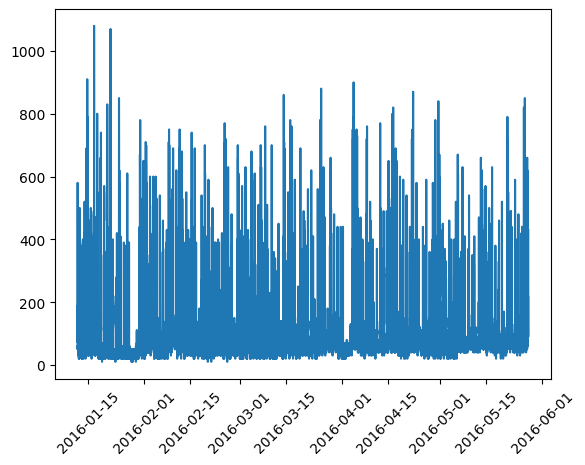

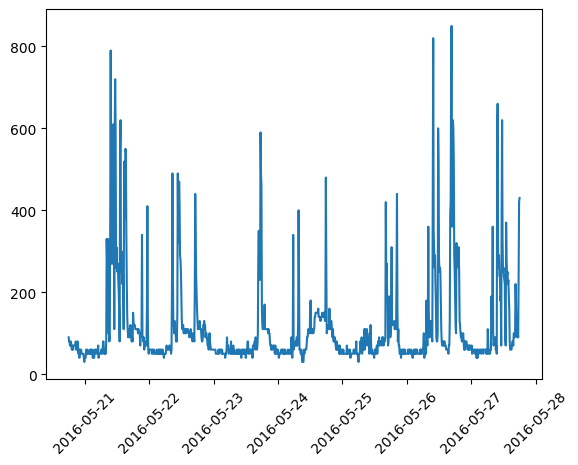

In [101]:
pdf['date'] = pd.to_datetime(pdf['date'])

max_date = pdf['date'].max()
min_date = max_date - pd.Timedelta(days=7)
one_week = pdf[(pdf.date>=min_date) & (pdf.date <= max_date)]

plt.plot(pdf.date, pdf.Appliances)
plt.xticks(rotation=45)
plt.show()

plt.plot(one_week.date, one_week.Appliances)
plt.xticks(rotation=45)
plt.show()

2. Plot heatmap of hourly consumption of appliances for a week.

C:\Users\jfrie\AppData\Local\Temp\ipykernel_18980\1043741851.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = one_week.pivot_table(index= 'hour_of_day', columns='day_of_week', values='Appliances', aggfunc='sum')


<Axes: xlabel='day_of_week', ylabel='hour_of_day'>

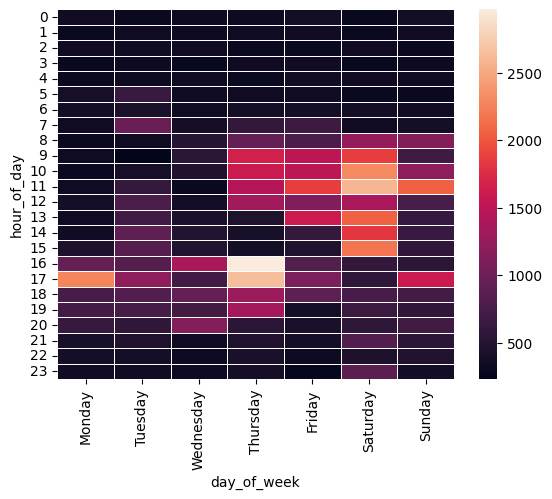

In [126]:
one_week.loc[:,'hour_of_day'] = one_week.loc[:,('date')].dt.hour
one_week.loc[:,'day_of_week'] = one_week.loc[:,('date')].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
one_week.loc[:,'day_of_week'] = pd.Categorical(one_week['day_of_week'], categories=day_order, ordered=True)

pivot_df = one_week.pivot_table(index= 'hour_of_day', columns='day_of_week', values='Appliances', aggfunc='sum')
sns.heatmap(pivot_df, linecolor='white', linewidths=0.5)


3. Plot the histogram of energy consumption of appliances

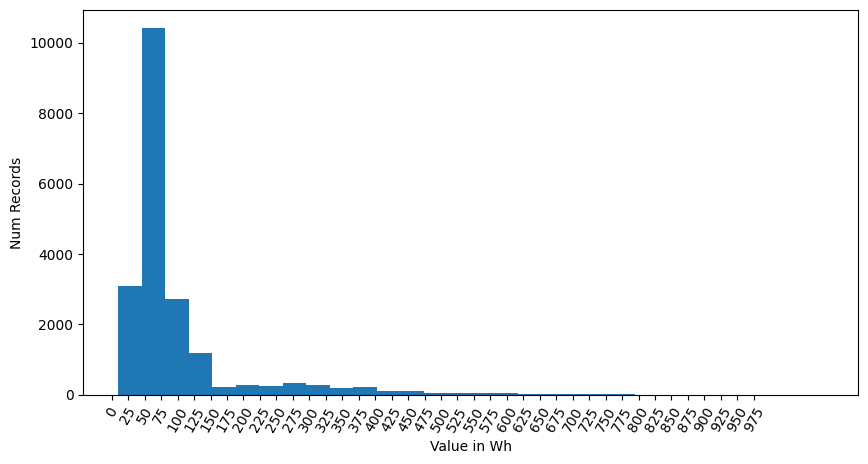

In [147]:
plt.figure(figsize=(10,5))
plt.hist(pdf['Appliances'], bins = 30)
plt.xlabel('Value in Wh')
plt.ylabel('Num Records')
plt.xticks(range(0,1000,25), rotation = 60)
plt.show()

4. Construct a feature variable NSM (no. of seconds from midnight) and plot energy
consumption vs. NSM.

**NOTE: I wasn't sure if 'from' meant *until* or *after*** I went with after, as it was slightly easier.

**NOTE: Previously, appliance consumption was specified, but here it wasn't.** That said, there is no generalized "consumption", so I continued using appliance consumption rather than presume to create another feature.

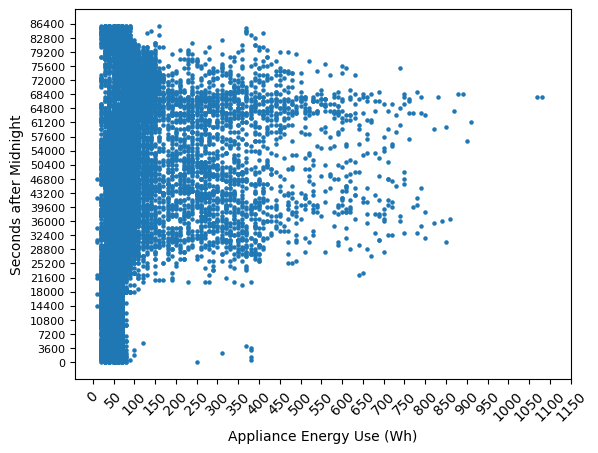

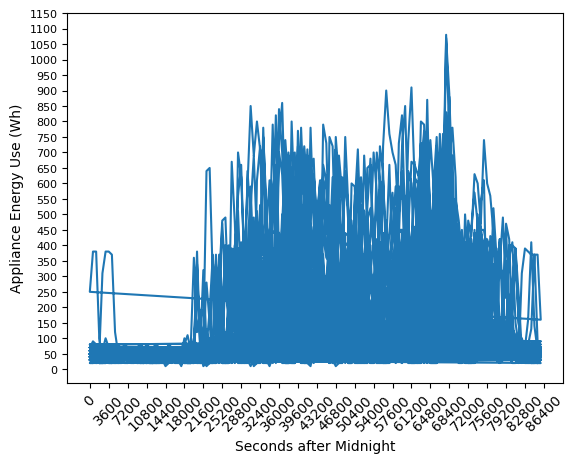

In [167]:
pdf.loc[:,'NSM'] = pdf['date'].dt.hour * 3600 + \
             pdf['date'].dt.minute * 60 + \
             pdf['date'].dt.second


plt.scatter(pdf.Appliances, pdf.NSM, s = 5)
plt.xlabel("Appliance Energy Use (Wh)")
plt.ylabel('Seconds after Midnight')
plt.xticks(range(0,1200,50), rotation = 45)
plt.yticks(range(0,86500,3600), fontsize=8)
plt.show()
plt.plot(pdf.NSM, pdf.Appliances)
plt.ylabel("Appliance Energy Use (Wh)")
plt.xlabel('Seconds after Midnight')
plt.yticks(range(0,1200,50), fontsize=8)
plt.xticks(range(0,86500,3600), rotation = 45)
plt.show()

5. Plot appliances energy consumption vs. Press mm Hg

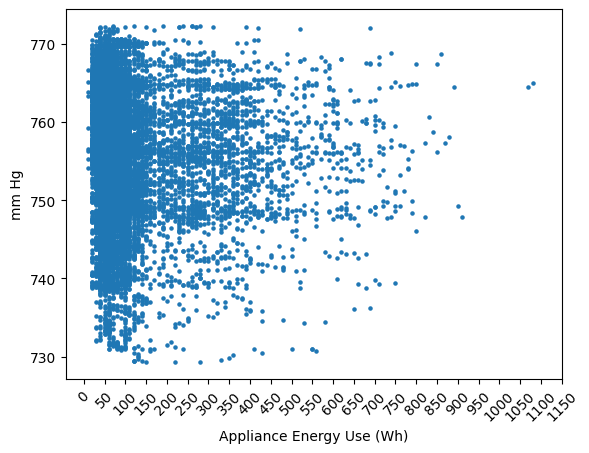

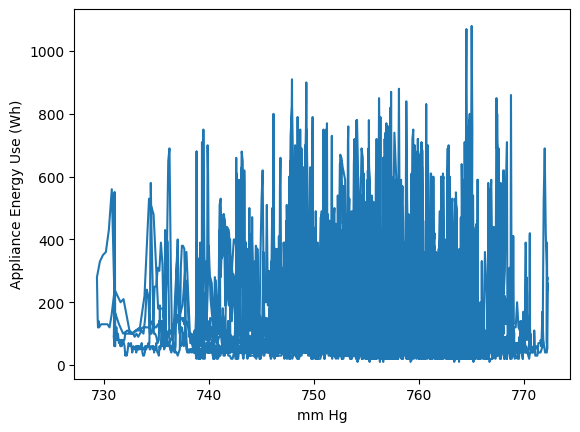

In [175]:
plt.scatter(pdf.Appliances, pdf.Press_mm_hg, s = 5)
plt.xlabel("Appliance Energy Use (Wh)")
plt.ylabel('mm Hg')
plt.xticks(range(0,1200,50), rotation = 45)
plt.show()
plt.plot(pdf.Press_mm_hg, pdf.Appliances)
plt.ylabel("Appliance Energy Use (Wh)")
plt.xlabel('mm Hg')
plt.show()

6. It is observed that the major contributing factors for the energy consumption
among all other features is NSM and Press mm Hg. Comment on it.

<hr>

There are two worthwhile perspectives to take on this finding:
1. The data appears rather noisy when making a simple line plot of usage against these features directly. This is a good example of the need for more robust and thoughtful processing to help identify and illustrate the apparent connections between different features than simple plotting alone may be capable of.
2. The correlation is intuitive or at least explainable: naturally our usage of energy is correlated to time of day, as human behaviors are varied throughout the time of day. Some of our more robust plotting of usage against time even reveals that consumption was highest during daylight hours, and on weekends. Additionally, it would make sense that energy usage corresponds at least in part to the weather, which is information that is at least partially captured by mm_Hg. Similar to the time of day and day of week, weather also tends to influence human behavior. However, in absence of that simple intuition, such a relationship would not be discovered using only a simple plot such as the one in part 2.2.5.

### 2.3 Multi-variate

**Data:** The NASA data set comprises different sizes of NACA 0012 airfoils at various wind
tunnel speeds and angles of attack. The span of the airfoil and the observer position were
the same in all of the experiments. This problem has the following inputs:

1. Frequency, in Hz.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is Scaled sound pressure level, in decibels.

**Task:** Load the data and Compute the following descriptive statistics of the data:
1. Mean
2. Variance (or Standard Deviation)
3. Median
4. Kurtosis
5. Skewness
6. Range

In [201]:
pdf2 = pd.read_csv('data/airfoil_self_noise.dat', delimiter = '\t', header = None, names = ['Freq_Hz', 'attack_deg', 'chord_len_m', 'FSV_mps', 'SS_disp_thickness_m', 'ssp_db'])
pdf2_stats = pdf2.describe().loc[('mean','50%','min','max','std'),:]
pdf2_stats.loc['Range',:] = pdf2_stats.loc[('max'),:]-pdf2_stats.loc[('min'),:]
pdf2_stats.loc['Skew',:] = pdf2.skew()
pdf2_stats.loc['Kurtosis',:] = pdf2.kurtosis()
pdf2_stats.drop(['min','max'], axis=0, inplace=True)
pdf2_stats.rename({'50%':'Median', 'mean':'Mean', 'std': 'StdDev'})

,Freq_Hz,attack_deg,chord_len_m,FSV_mps,SS_disp_thickness_m,ssp_db
Mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
Median,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
StdDev,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
Range,19800.000000,22.200000,0.279400,39.600000,0.058011,37.607000
Skew,2.137084,0.689164,0.457457,0.235852,1.702165,-0.418952
Kurtosis,5.708685,-0.412951,-1.037964,-1.563951,2.218903,-0.314187
